In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labes) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


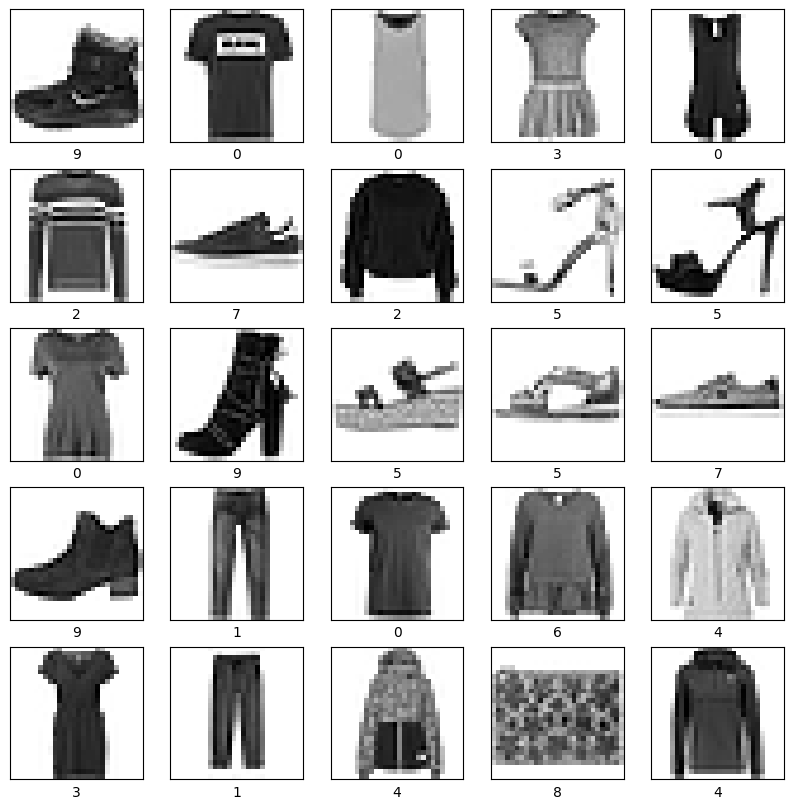

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
train_labels = to_categorical(train_labels, num_classes=10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256))
model.add(Dense(512))
model.add(Dense(10,Activation('softmax')))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,674 (1.29 MB)

 Trainable params: 337,674 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs=20,
                    batch_size=1024,verbose=1,shuffle=True,
                    validation_split=0.1)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5122 - loss: 156.1253 - val_accuracy: 0.7818 - val_loss: 15.0683
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7903 - loss: 11.2198 - val_accuracy: 0.7945 - val_loss: 6.5900
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7896 - loss: 5.5861 - val_accuracy: 0.8018 - val_loss: 4.4144
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7954 - loss: 3.7156 - val_accuracy: 0.7910 - val_loss: 3.3371
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8003 - loss: 2.6809 - val_accuracy: 0.7968 - val_loss: 2.8047
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8014 - loss: 2.3388 - val_accuracy: 0.7778 - val_loss: 2.4225
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7998 - loss: 1.7720 - val_accuracy: 0.7942 - val_loss: 1.9462
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7924 - loss: 1.7554 - val_accuracy: 0.7918

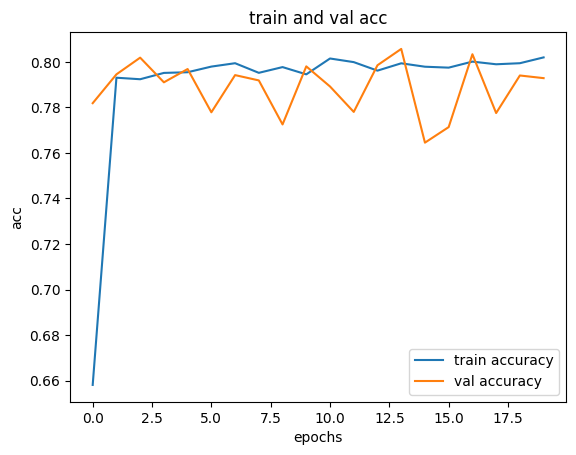

In [ ]:
plt.plot(history.history['accuracy'] , label='train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

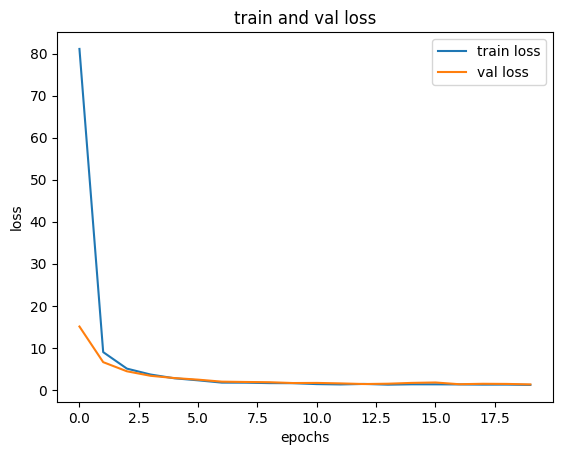

In [ ]:
plt.plot(history.history['loss'] , label='train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.title('train and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
label = np.argmax(train_labels, axis=1)
pred = np.argmax(model.predict(train_images), axis=1)
print(accuracy_score(label, pred)*100,"%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
80.58833333333332 %


In [ ]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

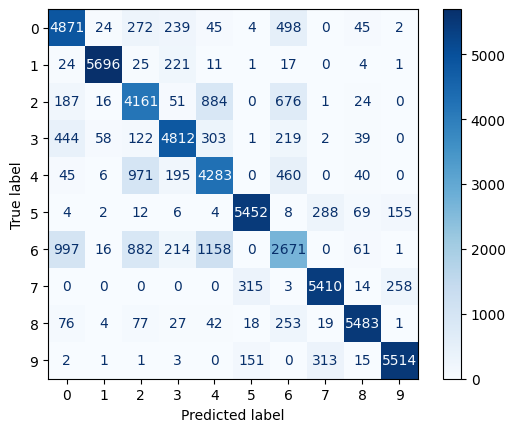

In [ ]:
cm = confusion_matrix(label, pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot(
    include_values=True,
    cmap="Blues",
    ax=None,
    xticks_rotation="horizontal",
    #values_format=".2%",
)
plt.show()

In [ ]:
#建立資料可視化函數
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label1 = np.argmax(true_label)
    if predicted_label == true_label1:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         np.argmax(true_label),
                                         color=color))

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    true_label1 = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label1].set_color('green')

In [ ]:
NN_predictions=model.predict(train_images)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


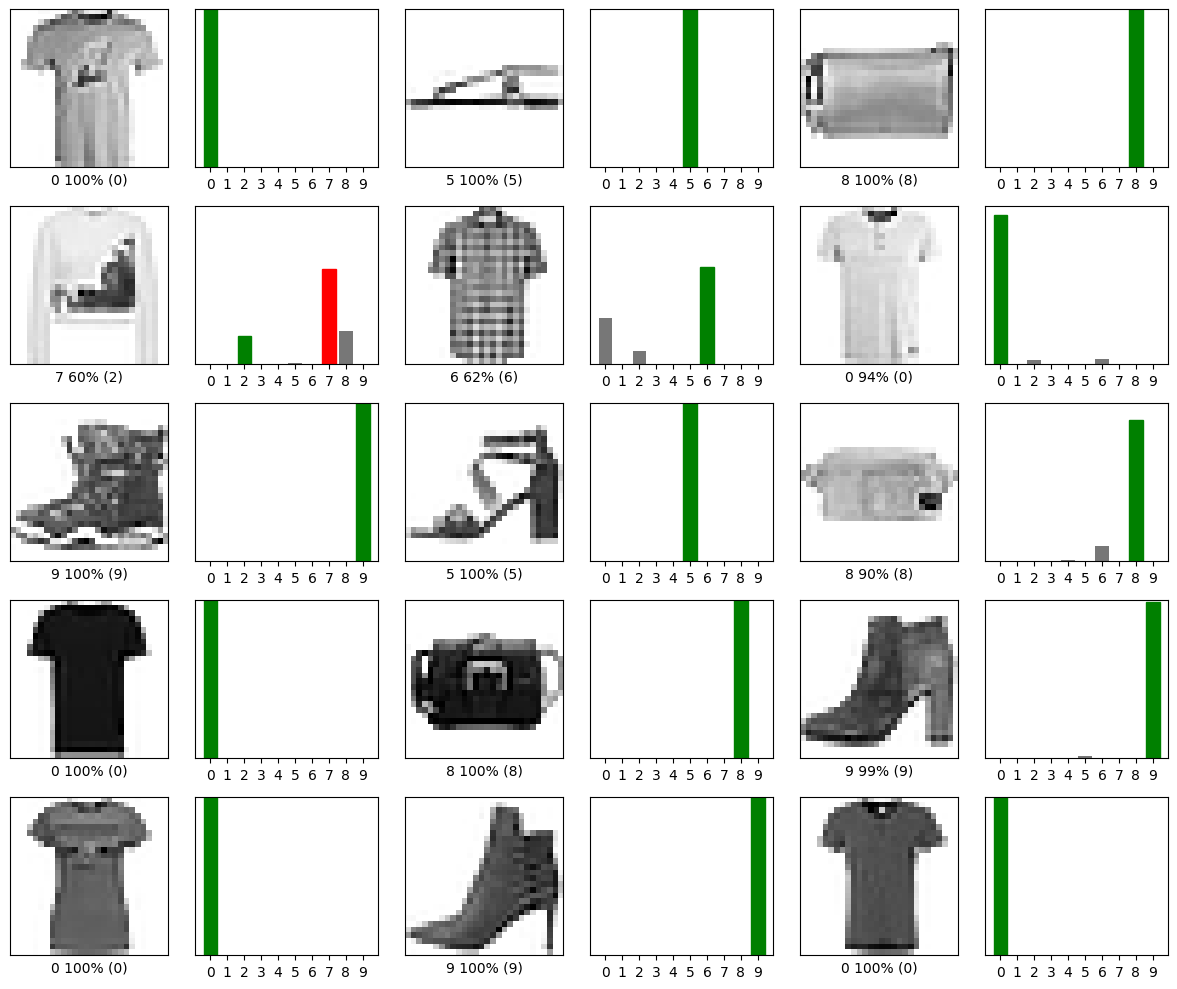

In [ ]:
import random
#驗證模型
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  k = random.randint(1, 10000)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(k, NN_predictions[k], train_labels, train_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(k, NN_predictions[k], train_labels)
plt.tight_layout()
plt.show()